# HW3 Making Waves: CDIP Dataset Tutorial and Use Case Examples
### View and evaluating wave height and temperature from the Coastal Data Information Program

## EDS 220, Fall 2021

#### Authors
Cullen Molitor, UC Santa Barbara (cullen_molitor@bren.ucsb.edu)
https://cullen-molitor.github.io/  
Jake Eisaguirre, UC Santa Barbara (eisaguirre@bren.ucsb.edu)
https://jake-eisaguirrer.github.io/  
Marie Rivers, UC Santa Barbars (mrivers@bren.ucsb.edu)
https://marierivers.github.io/

## Table of Contents

[1. Purpose](#purpose)

[2. Dataset Description](#data_description)

[3. Data Input/Output](#io)

[4. Metadata Display](#metadata)

[5. Basic Visualization](#visualize)

[6. Use Case Examples](#usecases)

[7. References](#references)

<a id='purpose'></a> 
### Notebook Purpose

This notebook was created to provide an introduction to NetCDF4 files and data from the [Coastal Data Information Program (CDIP)](https://cdip.ucsd.edu/) at the [Scripps Institute of Oceanography (SIO)](https://scripps.ucsd.edu/). This tutorial is based on a [python API](https://cdip.ucsd.edu/m/documents/data_access.html) which loads netCDF files. We also provide methods for using sea surface temperature and swell height to analyze the magnitude of El Nino/Southern Oscillation (ENSO) behavior at a specific location.

While these methods are applicable to other [CDIP wave buoy stations](https://cdip.ucsd.edu/m/deployment/station_view/), we chose the [Harvest Buoy (CDIP site)](http://cdip.ucsd.edu/themes/?d2=p9:s:71:st:1:m:mobile) to get information close to our local Santa Barabra, CA coast. The metadata is documented on the [CDIP informational site](https://cdip.ucsd.edu/m/documents/intro.html#).

<div>
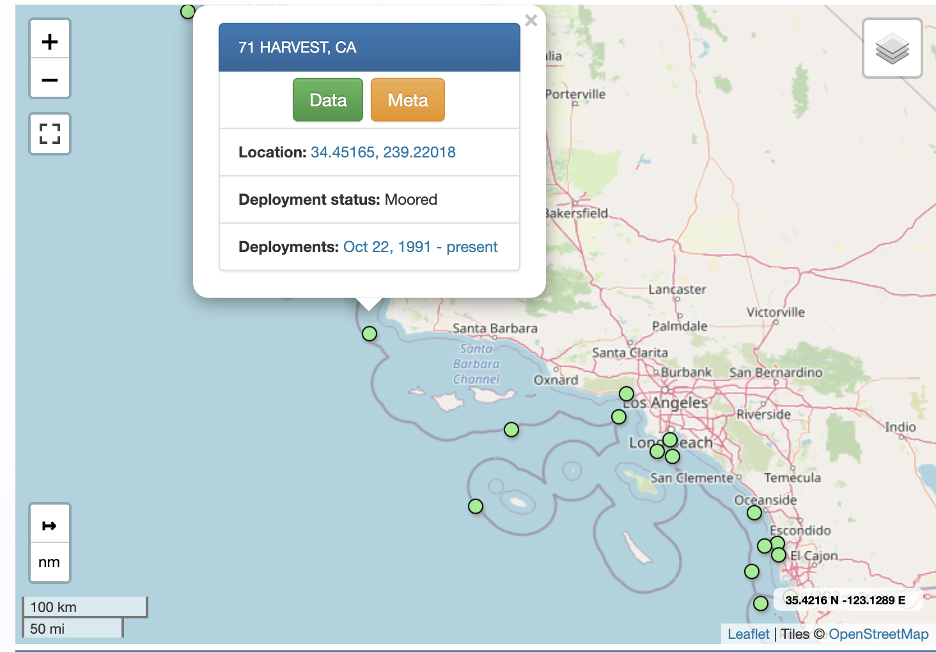  
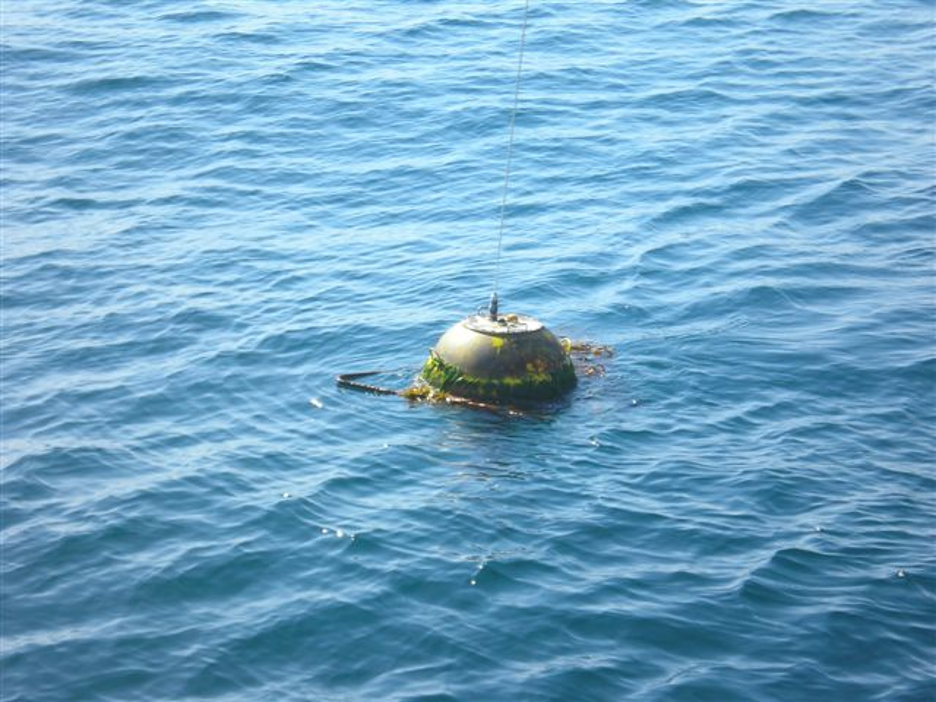
</div>

<a id='data_description'></a> 
### Dataset Description
**File format:** NetCDF  
**Data retrieval source:** CDIP portal and CDIP Python API
 
**Operator:** CDIP  
**Collaborators:** CleanSeas  
**Funding:** California Division of Boating and Waterways (CDBW) & US Army Corps of Engineer (USACE)

**Data Availability:** CDIP data and products are free available for public use  
**License:** These data may be redistributed and used without restriction

**Global coverage of stations:**  
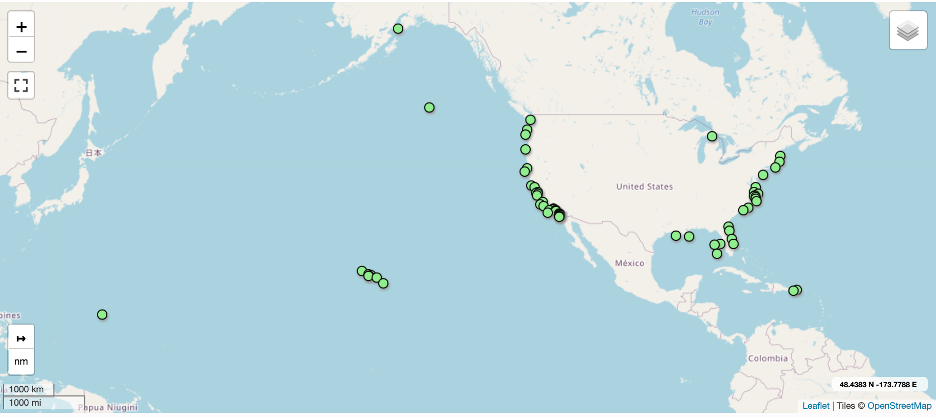

**Harvest buoy period of record:** October 1991 - present  

#### Measured wave parameters
- Hs = wave height, 30-minute average of the ⅓ highest waves at a sensor*
- Tp = peak period (most common period between consecutive waves)
- Dp = peak direction (most common direction)
*Statistically, highest wave during the measurement period ~1.8 x Hs

<div>
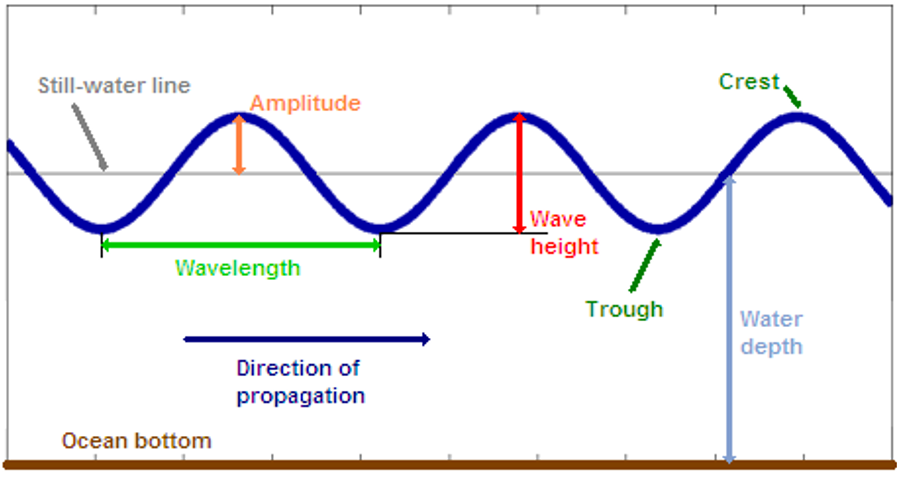
</div>

#### Temporal notes
-  Wave calcs use ~30 minute data samples
- Time assigned to the data is start time
- All data collected is archived by UTC time

#### Data Quality
- high quality publically released data excludes all records flagged by quality control procedures
- activity log documents deployments, transmission problems, maintenance issues, and battery/power failures

<font color='red'>**Here and throughout the notebook:** use a mix of markdown cells and code blocks to demonstrate your code. Markdown cells should be used to describe the purpose of the code blocks which follow them, but _do not replace_ comments within the code block! Make sure to include comments in the code as well illustrating the specific function of the various lines of code. Your later self - and other users - will thank you!</font>

<a id='io'></a> 
### Dataset Input/Output 

#### Import required packages

<div>
<im src="Documents/UCSB_Environmental_Data_Science/EDS_220_Remote_Sensing_and_Environmental_Data/220_group_project/mk-waves-tutorial/images/havest.png"/>
</div>



In [1]:
# Given
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import calendar
import pandas as pd
from matplotlib import gridspec
from matplotlib import cm
import matplotlib as mpl

#### Set parameters
- names of any directories where data are stored
- ranges of years over which data are valid
- any thresholds or latitude/longitude ranges to be used later (e.g. dimensions of NINO3.4 region, threshold SSTA values for El Nino, etc.)

[Link to other buoys](https://cdip.ucsd.edu/m/deployment/station_view/)

In [2]:
# Type
stn = '071'
startdate = "01/01/2014"
enddate = "12/30/2016"

#### Read in the data
we use the `netCDF4` module to read in the archived buoy data.

In [3]:
# Given
# CDIP Archived Dataset URL
data_url = 'http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/archive/' + stn + 'p1/' + stn + 'p1_historic.nc'

In [4]:
# Given
data = netCDF4.Dataset(data_url)

<a id='metadata'></a> 
#### Display metadata

In [5]:
# return the file type
type(data)

netCDF4._netCDF4.Dataset

In [6]:
# return a summary of the dataset
data.summary

'Directional wave and sea surface temperature measurements collected in situ by Datawell Waverider buoys located near HARVEST, CA from 1991/10/22 to 2019/06/17. This dataset includes publicly-released data only, excluding all records flagged bad by quality control procedures. A total of 372110 wave samples were analyzed for this area, where the water depth is approximately 183 to 549 meters.'

In [7]:
# return all variables included in the dataset
print(data.variables.keys())

dict_keys(['sourceFilename', 'waveTime', 'waveTimeBounds', 'waveFlagPrimary', 'waveFlagSecondary', 'waveHs', 'waveTp', 'waveTa', 'waveDp', 'wavePeakPSD', 'waveTz', 'waveSourceIndex', 'waveFrequency', 'waveFrequencyBounds', 'waveFrequencyFlagPrimary', 'waveFrequencyFlagSecondary', 'waveBandwidth', 'sstTime', 'sstTimeBounds', 'sstFlagPrimary', 'sstFlagSecondary', 'sstSeaSurfaceTemperature', 'sstSourceIndex', 'sstReferenceTemp', 'gpsTime', 'gpsTimeBounds', 'gpsStatusFlags', 'gpsLatitude', 'gpsLongitude', 'gpsSourceIndex', 'dwrTime', 'dwrTimeBounds', 'dwrSourceIndex', 'dwrBatteryLevel', 'dwrZAccelerometerOffset', 'dwrXAccelerometerOffset', 'dwrYAccelerometerOffset', 'dwrOrientation', 'dwrInclination', 'dwrBatteryWeeksOfLife', 'metaDeployLatitude', 'metaDeployLongitude', 'metaWaterDepth', 'metaDeclination', 'metaStationName', 'metaStationLatitude', 'metaStationLongitude', 'metaPlatform', 'metaInstrumentation', 'metaGridMapping', 'waveEnergyDensity', 'waveMeanDirection', 'waveA1Value', 'wave

The Harvest buoy collects data in the following categories:

- Significant Wave Height  
- Swell Height 
- Swell Period 
- Swell Direction 
- Wind Wave Height 
- Wind Wave Period 
- Wind Wave Direction 
- Wave Steepness 
- Average Wave Period 
- Water Temperature

We are interested in:

- Significant Wave Height (`waveHs`)
- Sea Surface Temperature (`sstSeaSurfaceTemperature`)

In [8]:
# learn more about a variable including long name, units, valid min/max values
print(data['sstSeaSurfaceTemperature'])

<class 'netCDF4._netCDF4.Variable'>
float32 sstSeaSurfaceTemperature(sstTime)
    long_name: sea surface temperature
    units: Celsius
    _FillValue: -999.99
    standard_name: sea_surface_temperature
    coordinates: metaStationLatitude metaStationLongitude
    grid_mapping: metaGridMapping
    valid_min: -5.0
    valid_max: 46.15
    ancillary_variables: sstFlagPrimary sstFlagSecondary
    ncei_name: SEA SURFACE TEMPERATURE
    cell_methods: sstTime: point
unlimited dimensions: 
current shape = (372015,)
filling off


In [9]:
# Other Variables
# data.variables
# Hs = data.variables['waveHs']
# Tp = data.variables['waveTp']
# Dp = data.variables['waveDp'] 

#### Clean data

[Example code found here](http://cdip.ucsd.edu/themes/?zoom=auto&tz=UTC&ll_fmt=dm&numcolorbands=100&palette=cdip_classic&high=4.572&r=7&un=1&pb=1&d2=p70&u2=s:071:st:1:v:product_descriptions)

To clean the data start by setting variables for time, the buoy station, month, and year

In [10]:
#  ---- Potential start point -----

# Get SST timestamp variable 
sst_time_var = data.variables['sstTime']

# Get SST variable 
sst = data.variables['sstSeaSurfaceTemperature'][:]

# Get wave height timestamp variable
wave_time_var = data.variables['waveTime']

# Get wave height variable 
wave = data.variables['waveHs'][:]

wave_dir = data.variables['waveDp'][:]

We used the cftime Python library for decoding time units and variable values in a netCDF file conforming to the Climate and Forecasting (CF) netCDF conventions.

[cftime documentation](https://unidata.github.io/cftime/)

First we created dataframes for the sea surface temperature and wave data. We then aggregatted this data by month and joined the dataframes to create one dataframe of buoy variables.

In [11]:
# Use num2date on sst_time_var
sst_time = netCDF4.num2date(sst_time_var[:], sst_time_var.units, only_use_cftime_datetimes=False)

In [12]:
# Make an empty pandas dataframe
sst_df = pd.DataFrame()

# Fill it with SST and the date time it was collected
sst_df['sst'] = sst
sst_df['date_time'] = sst_time

In [13]:
# Make date_time column a pandas date_time
sst_df['date_time'] = pd.to_datetime(sst_df['date_time']) 

# Pull out date from datetime
sst_df['date'] = sst_df['date_time'].dt.date

# Pull out month from datetime
sst_df['month'] = sst_df['date_time'].dt.month

# Pull out year from datetime
sst_df['year'] = sst_df['date_time'].dt.year

In [14]:
# Use num2date on wave_time_var
wave_time = netCDF4.num2date(wave_time_var[:], wave_time_var.units, only_use_cftime_datetimes=False)

In [15]:
# Make an empty pandas dataframe
wave_df = pd.DataFrame()

# Fill it with SST and the date time it was collected
wave_df['wave'] = wave
wave_df['wave_dir'] = wave_dir
wave_df['date_time'] = wave_time

In [16]:
# Make date_time column a pandas date_time
wave_df['date_time'] = pd.to_datetime(wave_df['date_time']) 

# Pull out date from datetime
wave_df['date'] = wave_df['date_time'].dt.date

# Pull out month from datetime
wave_df['month'] = wave_df['date_time'].dt.month

# Pull out year from datetime
wave_df['year'] = wave_df['date_time'].dt.year

In [17]:
type(wave_df['wave_dir'])

pandas.core.series.Series

In [18]:
# Inspect data
sst_df.head()

,sst,date_time,date,month,year
0,16.00,1991-10-22 08:21:00,1991-10-22,10,1991
1,16.00,1991-10-22 08:51:00,1991-10-22,10,1991
2,15.90,1991-10-22 09:21:00,1991-10-22,10,1991
3,15.90,1991-10-22 09:51:00,1991-10-22,10,1991
4,15.85,1991-10-22 10:21:00,1991-10-22,10,1991


In [19]:
wave_df.head()

,wave,wave_dir,date_time,date,month,year
0,1.50,321.500000,1991-10-22 07:52:00,1991-10-22,10,1991
1,1.48,321.500000,1991-10-22 08:22:00,1991-10-22,10,1991
2,1.54,318.687500,1991-10-22 08:52:00,1991-10-22,10,1991
3,1.56,318.687500,1991-10-22 09:22:00,1991-10-22,10,1991
4,1.59,325.718811,1991-10-22 09:52:00,1991-10-22,10,1991


<a id='visualize'></a> 
### Visualize data

We started by visualizing the full dataset to inform our further analysis. Based on the data gaps shown in the plot above, we decided to begin our analysis at 1997.

Text(0, 0.5, 'Wave direction, m')

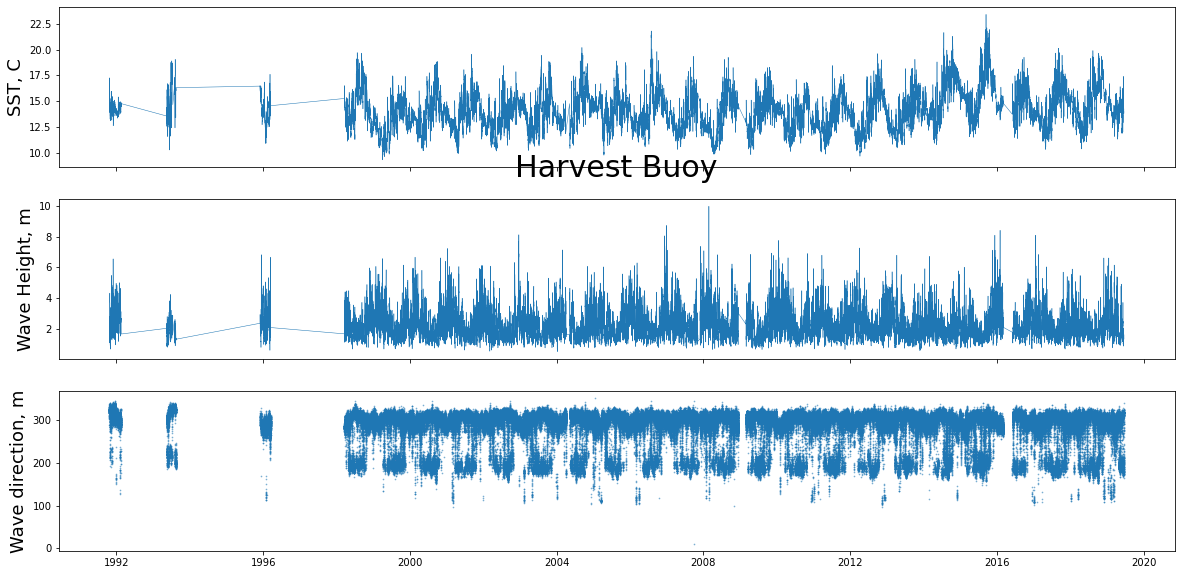

In [20]:
# Plot here to see what the data looks like
f, (pSst, pHs, pWd) = plt.subplots(3, 1, sharex=True, figsize=(20,10)) 

plt.title("Harvest Buoy", fontsize=30, y = 2.3)

pSst.plot(sst_df.date, sst_df.sst, linewidth = 0.5)
pSst.set_ylabel('SST, C', fontsize=18)

pHs.plot(wave_df.date, wave_df.wave, linewidth = 0.5)
pHs.set_ylabel('Wave Height, m', fontsize=18)

pWd.scatter(wave_df.date, wave_df.wave_dir, s = 0.5, alpha = .5)
pWd.set_ylabel('Wave direction, m', fontsize=18)

<a id='usecases'></a> 
### Use Cases Examples


<font color='red'>This is the "meat" of the notebook, and what will take the majority of the time to present in class. This section should provide:</font>

<font color='red'>1) A plain-text summary (1-2 paragraphs) of the use case example you have chosen: include the target users and audience, and potential applicability. For example, the Week 7 SST exercise might discuss how the state of the ENSO system can be important for seasonal weather forecasts/coral bleaching outlooks, then mention the typical diagnostics associated with ENSO (i.e. identification of El Nino/La Nina events).</font>

<font color='red'>2) Markdown and code blocks demonstrating how one walks through the desired use case example. This should be similar to the labs we've done in class: you might want to demonstrate how to isolate a particularly interesting time period, then create an image showing a feature you're interested in, for example.</font>

<font color='red'>3) A discussion of the results and how they might be extended on further analysis. For example, we are doing El Nino/La Nina composites in class; a natural extension might be to look at individual events to see what their particular impacts were. Or if there are data quality issues which impact the results, you could discuss how these might be mitigated with additional information/analysis.</font>

<font color='red'>Just keep in mind, you'll have roughly 20 minutes for your full presentation, and that goes surprisingly quickly! Probably 2-3 diagnostics is the most you'll be able to get through (you could try practicing with your group members to get a sense of timing).</font>

In [21]:
# Filter data to be greater than 1997 to dump missing values
sst_df = sst_df[sst_df['year'] > 1997]

wave_df = wave_df[wave_df['year'] > 1997]

In [22]:
# Group by date and summarise with mean SST and Wave Height
sst_monthly = sst_df.groupby(['month', 'year']).agg({'sst': 'mean'})

wave_monthly = wave_df.groupby(['month', 'year']).agg({'wave': 'mean', 'wave_dir': 'mean'})

In [23]:
# Inspect Data
print(sst_monthly.head())
print(wave_monthly.head())

                  sst
month year           
1     1999  13.194914
      2000  13.023686
      2001  13.454234
      2002  12.896236
      2003  14.313378
                wave    wave_dir
month year                      
1     1999  2.467315  293.072021
      2000  2.126410  298.007782
      2001  2.971848  292.069885
      2002  2.609128  295.690613
      2003  2.432630  283.118591


In [24]:
buoy_df = sst_monthly.join(wave_monthly)
buoy_df.head()

sst      wave    wave_dir
month year                                 
1     1999  13.194914  2.467315  293.072021
      2000  13.023686  2.126410  298.007782
      2001  13.454234  2.971848  292.069885
      2002  12.896236  2.609128  295.690613
      2003  14.313378  2.432630  283.118591

Next we used `reset_index` to ungroup the data

In [25]:
buoy_mon = buoy_df.groupby(['month']).agg({'sst': 'mean', 'wave': 'mean', 'wave_dir': 'mean'}) 
buoy_mon

,sst,wave,wave_dir
month,,,
1,13.653013,2.555695,290.373718
2,13.265497,2.548285,289.589111
3,12.828510,2.512404,290.359467
4,12.088199,2.418373,288.833313
5,12.406616,2.140668,279.296417
6,13.322064,2.022174,280.062286
7,14.602171,1.735988,276.869568
8,15.063936,1.618995,272.637451
9,15.693844,1.786226,273.738617


In [26]:
# since this line of code was so long, use used a `\` to break up the line. You can also split up lines at commas
buoy_df = buoy_df - buoy_mon
buoy_df.head()

sst      wave  wave_dir
month year                              
1     1999 -0.458099 -0.088380  2.698303
      2000 -0.629327 -0.429286  7.634064
      2001 -0.198779  0.416153  1.696167
      2002 -0.756777  0.053433  5.316895
      2003  0.660365 -0.123065 -7.255127

You need to reset the index each time you group the data

In [27]:
buoy_df = buoy_df.reset_index()
buoy_df

,month,year,sst,wave,wave_dir
0,1,1999,-0.458099,-0.088380,2.698303
1,1,2000,-0.629327,-0.429286,7.634064
2,1,2001,-0.198779,0.416153,1.696167
3,1,2002,-0.756777,0.053433,5.316895
4,1,2003,0.660365,-0.123065,-7.255127
...,...,...,...,...,...
247,12,2014,2.599428,0.120727,-4.072296
248,12,2015,1.697143,0.694733,5.822510
249,12,2016,-0.498254,-0.282156,3.452271
250,12,2017,0.813306,-0.613285,-2.958069


In [28]:
# rename columns
buoy_df = buoy_df.rename(columns = {'sst':'buoy_sst_anom', 'wave':'buoy_wave_anom'})

# set datetime 
buoy_df = buoy_df.assign(day = 1) 
buoy_df['date'] = pd.to_datetime(buoy_df[['year', 'month', 'day']])
buoy_df = buoy_df.sort_values(by=['date'])
buoy_df = buoy_df.set_index('date')

In [29]:
buoy_df

,month,year,buoy_sst_anom,buoy_wave_anom,wave_dir,day
date,,,,,,
1998-03-01,3,1998,1.834283,0.105816,-2.679443,1
1998-04-01,4,1998,0.914924,-0.130027,2.970428,1
1998-05-01,5,1998,0.674051,-0.090042,-12.808014,1
1998-06-01,6,1998,0.614153,-0.300137,-26.203918,1
1998-07-01,7,1998,1.214789,0.132242,20.776978,1
...,...,...,...,...,...,...
2019-02-01,2,2019,0.651257,0.147745,-3.558197,1
2019-03-01,3,2019,0.618302,-0.183959,-5.787933,1
2019-04-01,4,2019,1.279213,-0.132941,3.250793,1


## read in enso data

In [30]:
path = "https://www.cpc.ncep.noaa.gov/data/indices/ersst5.nino.mth.91-20.ascii"
enso = pd.read_csv(path, sep = '\s{2,}', engine = 'python')
enso

,YR,MON,NINO1+2,ANOM,NINO3,ANOM.1,NINO4,ANOM.2,NINO3.4,ANOM.3
0,1950,1,23.01,-1.55,23.56,-2.10,26.94,-1.38,24.55,-1.99
1,1950,2,24.32,-1.78,24.89,-1.52,26.67,-1.53,25.06,-1.69
2,1950,3,25.11,-1.38,26.36,-0.84,26.52,-1.80,25.87,-1.42
3,1950,4,23.63,-1.90,26.44,-1.14,26.90,-1.73,26.28,-1.54
4,1950,5,22.68,-1.74,25.69,-1.57,27.73,-1.18,26.18,-1.75
...,...,...,...,...,...,...,...,...,...,...
857,2021,6,22.75,-0.37,26.30,-0.32,28.83,-0.14,27.45,-0.28
858,2021,7,21.74,-0.22,25.49,-0.32,28.67,-0.22,26.91,-0.38
859,2021,8,20.71,-0.30,24.66,-0.46,28.53,-0.26,26.35,-0.51
860,2021,9,20.06,-0.67,24.46,-0.44,28.23,-0.53,26.16,-0.56


In [31]:
enso = enso.drop(enso.columns[[2, 3, 4, 5, 6, 7, 8]], axis=1)
enso = enso.rename(columns={"YR":"year", "MON":"month", "ANOM.3": "enso_anom"})
enso

,year,month,enso_anom
0,1950,1,-1.99
1,1950,2,-1.69
2,1950,3,-1.42
3,1950,4,-1.54
4,1950,5,-1.75
...,...,...,...
857,2021,6,-0.28
858,2021,7,-0.38
859,2021,8,-0.51
860,2021,9,-0.56


In [32]:
enso = enso.assign(day = 1)
enso['date'] = pd.to_datetime(enso[['year', 'month', 'day']])

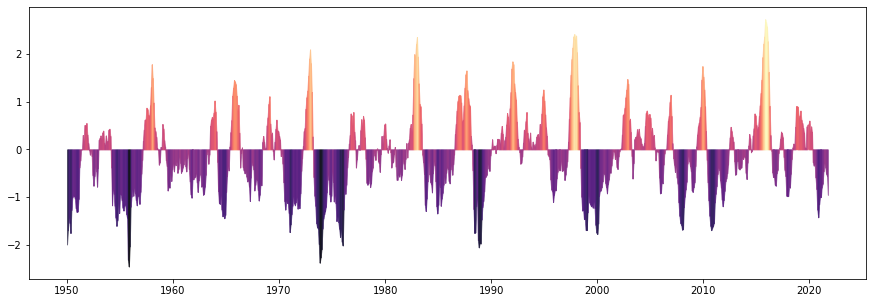

In [33]:
#given
# Choose color gradient here
# https://matplotlib.org/stable/tutorials/colors/colormaps.html 

colourmap = cm.get_cmap('magma')

xx = enso.date
yy =  enso.enso_anom

plt.figure(figsize = (15, 5))
plt.plot(xx,yy, color = 'none')

normalize = mpl.colors.Normalize(vmin=yy.min(), vmax=yy.max())
npts = 862
for i in range(npts - 1):
    plt.fill_between([xx[i], xx[i+1]],
                     [yy[i], yy[i+1]],
                     color=colourmap(normalize(yy[i]))
                     ,alpha=0.6)
plt.show()

### Joining enso and buoy data

In [34]:
buoy_df = buoy_df.drop(["month", "year", "day"], axis=1).reset_index()
enso = enso.drop(["year", "month", "day"], axis = 1)

In [35]:
anom_df = buoy_df.set_index('date').join(enso.set_index('date')).reset_index()

In [36]:
anom_df

,date,buoy_sst_anom,buoy_wave_anom,wave_dir,enso_anom
0,1998-03-01,1.834283,0.105816,-2.679443,1.34
1,1998-04-01,0.914924,-0.130027,2.970428,0.78
2,1998-05-01,0.674051,-0.090042,-12.808014,0.57
3,1998-06-01,0.614153,-0.300137,-26.203918,-0.39
4,1998-07-01,1.214789,0.132242,20.776978,-0.99
...,...,...,...,...,...
247,2019-02-01,0.651257,0.147745,-3.558197,0.71
248,2019-03-01,0.618302,-0.183959,-5.787933,0.81
249,2019-04-01,1.279213,-0.132941,3.250793,0.62
250,2019-05-01,1.683944,-0.227627,-28.799072,0.55


Text(0, 0.5, 'ENSO SST Anomaly')

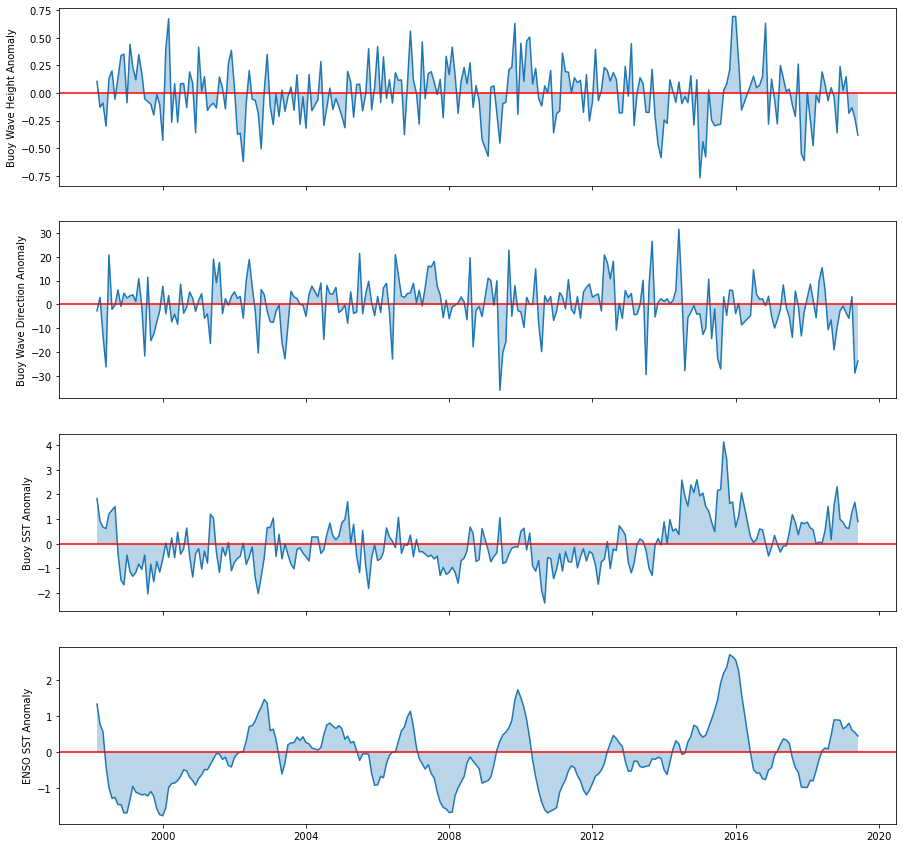

In [37]:
# Set subplots with pyplot
f, (bwa, bwd, bsa, esa) = plt.subplots(4, 1, sharex=True, figsize=(15,15))

# bwd is Buoy Wave Height Anomaly
bwa.plot(anom_df.date, anom_df.buoy_wave_anom)
bwa.fill_between(anom_df.date, anom_df.buoy_wave_anom, 0, alpha=0.30)
bwa.axhline(0,color='red')
bwa.set_ylabel('Buoy Wave Height Anomaly')

# bwd is Buoy Wave Direction Anomaly
bwd.plot(anom_df.date, anom_df.wave_dir)
bwd.fill_between(anom_df.date, anom_df.wave_dir, 0, alpha=0.30)
bwd.axhline(0,color='red')
bwd.set_ylabel('Buoy Wave Direction Anomaly')

# bsa is Buoy SST Anomaly
bsa.plot(anom_df.date, anom_df.buoy_sst_anom)
bsa.fill_between(anom_df.date, anom_df.buoy_sst_anom,  0, alpha=0.30)
bsa.axhline(0,color='red')
bsa.set_ylabel('Buoy SST Anomaly')

# esa is ENSO SST Anomaly
esa.plot(anom_df.date, anom_df.enso_anom)
esa.fill_between(anom_df.date, anom_df.enso_anom,  0, alpha=0.30)
esa.axhline(0,color='red')
esa.set_ylabel('ENSO SST Anomaly')

## Model

In [38]:
import statsmodels.api as sm

In [39]:
# Simple linear model
model = sm.OLS(anom_df.buoy_sst_anom, anom_df.enso_anom)

# Model results
results = model.fit()

# Model summary
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:          buoy_sst_anom   R-squared (uncentered):                   0.282
Model:                            OLS   Adj. R-squared (uncentered):              0.279
Method:                 Least Squares   F-statistic:                              98.58
Date:                Thu, 18 Nov 2021   Prob (F-statistic):                    8.24e-20
Time:                        19:38:28   Log-Likelihood:                         -312.83
No. Observations:                 252   AIC:                                      627.7
Df Residuals:                     251   BIC:                                      631.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [40]:
# Simple linear model
model = sm.OLS(anom_df.wave_dir, anom_df.enso_anom)

# Model results
results = model.fit()

# Model summary
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               wave_dir   R-squared (uncentered):                   0.009
Model:                            OLS   Adj. R-squared (uncentered):              0.005
Method:                 Least Squares   F-statistic:                              2.200
Date:                Thu, 18 Nov 2021   Prob (F-statistic):                       0.139
Time:                        19:38:28   Log-Likelihood:                         -938.15
No. Observations:                 252   AIC:                                      1878.
Df Residuals:                     251   BIC:                                      1882.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [41]:
# Simple linear model
model = sm.OLS(anom_df.wave_dir, anom_df.buoy_sst_anom)

# Model results
results = model.fit()

# Model summary
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               wave_dir   R-squared (uncentered):                   0.058
Model:                            OLS   Adj. R-squared (uncentered):              0.054
Method:                 Least Squares   F-statistic:                              15.44
Date:                Thu, 18 Nov 2021   Prob (F-statistic):                    0.000110
Time:                        19:38:28   Log-Likelihood:                         -931.72
No. Observations:                 252   AIC:                                      1865.
Df Residuals:                     251   BIC:                                      1869.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [42]:
# Simple linear model
model = sm.OLS(anom_df.buoy_wave_anom, anom_df.enso_anom)

# Model results
results = model.fit()

# Model summary
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:         buoy_wave_anom   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.004
Method:                 Least Squares   F-statistic:                           0.006418
Date:                Thu, 18 Nov 2021   Prob (F-statistic):                       0.936
Time:                        19:38:28   Log-Likelihood:                         -11.128
No. Observations:                 252   AIC:                                      24.26
Df Residuals:                     251   BIC:                                      27.79
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [51]:
# Simple linear model
model = sm.OLS(anom_df.buoy_wave_anom, anom_df.buoy_sst_anom)

# Model results
results = model.fit()

# Model summary
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:         buoy_wave_anom   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):              0.031
Method:                 Least Squares   F-statistic:                              9.167
Date:                Thu, 18 Nov 2021   Prob (F-statistic):                     0.00272
Time:                        19:40:10   Log-Likelihood:                         -6.6118
No. Observations:                 252   AIC:                                      15.22
Df Residuals:                     251   BIC:                                      18.75
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Text(0, 0.5, 'ENSO SST Anomaly')

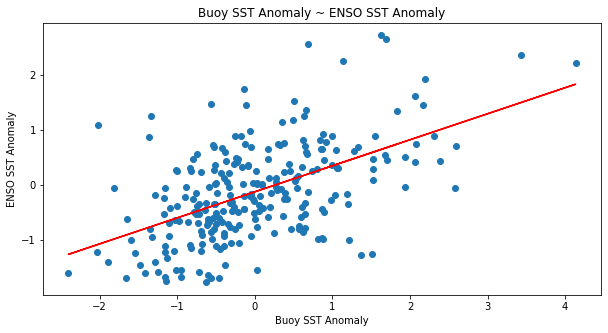

In [44]:
m, b = np.polyfit(anom_df.buoy_sst_anom, anom_df.enso_anom, 1)
plt.figure(figsize = (10, 5))
plt.scatter(anom_df.buoy_sst_anom, anom_df.enso_anom)
plt.plot(anom_df.buoy_sst_anom, m * anom_df.buoy_sst_anom + b, color = 'red')
plt.title('Buoy SST Anomaly ~ ENSO SST Anomaly')
plt.xlabel('Buoy SST Anomaly')
plt.ylabel('ENSO SST Anomaly')

Text(0, 0.5, 'ENSO SST Anomaly')

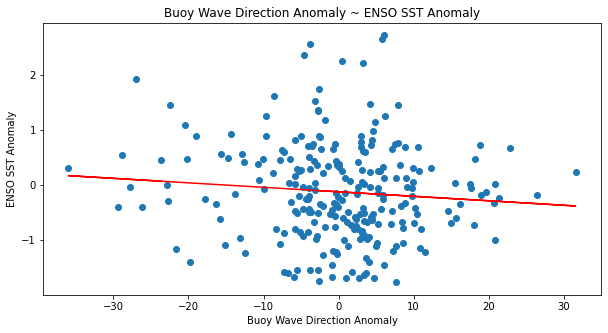

In [45]:
m, b = np.polyfit(anom_df.wave_dir, anom_df.enso_anom, 1)
plt.figure(figsize = (10, 5))
plt.scatter(anom_df.wave_dir, anom_df.enso_anom)
plt.plot(anom_df.wave_dir, m * anom_df.wave_dir + b, color = 'red')
plt.title('Buoy Wave Direction Anomaly ~ ENSO SST Anomaly')
plt.xlabel('Buoy Wave Direction Anomaly')
plt.ylabel('ENSO SST Anomaly')

Text(0, 0.5, 'Buoy SST Anomaly')

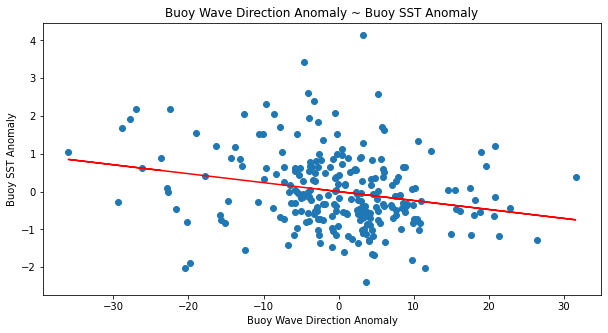

In [46]:
m, b = np.polyfit(anom_df.wave_dir, anom_df.buoy_sst_anom, 1)
plt.figure(figsize = (10, 5))
plt.scatter(anom_df.wave_dir, anom_df.buoy_sst_anom)
plt.plot(anom_df.wave_dir, m * anom_df.wave_dir + b, color = 'red')
plt.title('Buoy Wave Direction Anomaly ~ Buoy SST Anomaly')
plt.xlabel('Buoy Wave Direction Anomaly')
plt.ylabel('Buoy SST Anomaly')

Text(0, 0.5, 'ENSO SST Anomaly')

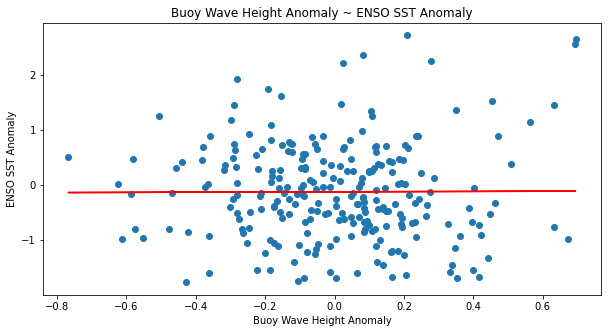

In [47]:
m, b = np.polyfit(anom_df.buoy_wave_anom, anom_df.enso_anom, 1)
plt.figure(figsize = (10, 5))
plt.scatter(anom_df.buoy_wave_anom, anom_df.enso_anom)
plt.plot(anom_df.buoy_wave_anom, m * anom_df.buoy_wave_anom + b, color = 'red')
plt.title('Buoy Wave Height Anomaly ~ ENSO SST Anomaly')
plt.xlabel('Buoy Wave Height Anomaly')
plt.ylabel('ENSO SST Anomaly')

Text(0, 0.5, 'Buoy SST Anomaly')

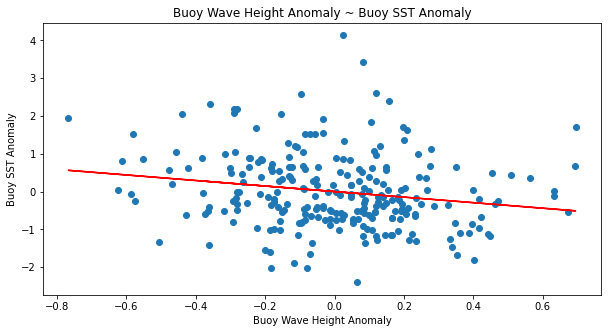

In [50]:
m, b = np.polyfit(anom_df.buoy_wave_anom, anom_df.buoy_sst_anom, 1)
plt.figure(figsize = (10, 5))
plt.scatter(anom_df.buoy_wave_anom, anom_df.buoy_sst_anom)
plt.plot(anom_df.buoy_wave_anom, m * anom_df.buoy_wave_anom + b, color = 'red')
plt.title('Buoy Wave Height Anomaly ~ Buoy SST Anomaly')
plt.xlabel('Buoy Wave Height Anomaly')
plt.ylabel('Buoy SST Anomaly')

### Observational Data vs Modeled Data

The CDIP buoy network is a valuable resource for marine scientists, coastal managers, and mariners. The **historic data** (observational) is archived and is of great use for understanding past patterns and provides context for understanding the oceanographic conditions of our local ocean. **Real time data** (obsrvaltional) gives an better idea of what to expect as wave energy moves past the buoy and towards our shorline. It is also incredibly useful for mariners navigating these sometimes harsh and volotile waters. Forecasted data (modeled) is perhaps the most practical use case for mariners, as they not only need to know the current conditions but they need to know how those conditions are changing in order to navigate safely. 

CDIP provide what they call ['nowcasted' data and 'forecasted' data](https://cdip.ucsd.edu/m/documents/models.html#about-the-cdip-wave-forecast-model). 
- Nowcasted provides insight at a higher resolution for the upcoming 6-hour period. These predictions tend to be more accurate and are generally fairly trustworthy. 
- Forecasted data provide a look further into the future, but with a greater amount of uncertainty  

### General Use Cases

- Modeling coastal errosion 
- Investigating storm frequecny and intensity over time
- Investigating changes in SST over time
- Detecting upwelling events

### Our interest

<font color='purple'>We are interested in investigating the effect of El Niño on our local oceanographic conditions. We would like to plot and compare the 2015-2016 El Niño event against all other time periods to see if there is a noticeable increase in wave energy or a significant divergence in swell direction. </font>

Typically temperature anamolies are calcuated from a 30 year base period. Since we only had ~20 years of consistent data, we calculated monthly means since 1997 and used these as base values from which to compare monthly means for each year.

The CDIP data is also useful for modeling the relationship between anomalies near the equator and local conditions, in our case - Santa Barbara

<a id='references'></a> 
### References

References used to create this tutorial include:

1. Coastal Data Information Program (CDIP): https://cdip.ucsd.edu/
2. Coastal Data Information Program (CDIP) data access documentation: https://cdip.ucsd.edu/m/documents/data_access.html
3. Harvest bouy, station 071: https://cdip.ucsd.edu/m/products/?stn=071p1 

**Data citation:** Data furnished by the Coastal Data Information Program (CDIP), Integrative Oceanography Division, operated by the Scripps Institution of Oceanography, under the sponsorship of the U.S. Army Corps of Engineers and the California Department of Parks and Recreation